<center> <h1>PREDICIÓN DEL SUEÑO CON MLP BINARIO</h1> </center>
<center> <h4>Noemi González, Roberto Holgado y Carmen Plaza seco</h4> </center>


###### Indice

En este jupyter notebook se lleva a cabo la construcción de un clasificador MLP de salida binaria para predecir el el estado de vigilia o sueño ligero y  el de sueño profundo.

    1. Clasficador MLP binario
        1.1 Preparación datos de entrada y salida
        1.2 Creación del modelo y selección parámetros libres
        1.3 Evaluación del modelo
        1.4 Visualización de resultados

In [1]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
import sklearn

## 1. CLASIFICADOR MLP BINARIO

Se ha utilizado un perceptrón multicapa para clasificar la vigilia o sueño ligero del sueño profundo. Es decir, se ha construido un clasificador con salida binaria.

### 1.1 Preparación datos de entrada y salida

In [2]:
Train_bin= pd.read_csv('Train_binary.csv')
Test_bin= pd.read_csv('Test_binary.csv')

In [3]:
X_train_bin=Train_bin.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1) 
y_train_bin=Train_bin['Etiquetas binarias']

X_test_bin=Test_bin.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1)
y_test_bin=Test_bin['Etiquetas binarias']

### 1.2  Creación del modelo y selección parámetros libres

Se proponen posibles valores de neuronas en la capa oculta para ver con cuál de ellos se obtienen las mejores prestaciones para el modelo. Se crea una tabla que recoge la pérdidas para cada valor del número de neuronas y aquel que tenga menos pérdida es el que se utilizará para el conjunto de test.

Se estudia el número de neuronas para un rango de 4 a 20 cogiendo los valores con saltos de 3.

In [4]:
# Tabla para recoger las prestaciones en train 
columns  = ['Loss','Score']
comp_train = pd.DataFrame(columns=columns)


In [5]:
# Número de neuronas de la capa oculta
n_hidden=range(4,20,3)

for i in n_hidden:
    
    print('\033[4;32m' + 'MLP clasiffier with',i,'neurons in the hidden layer' + '\033[0m')

    model=MLPClassifier(activation='relu', batch_size=50, hidden_layer_sizes=(i,), learning_rate='constant',
        learning_rate_init=0.1, shuffle=True, solver='sgd', early_stopping=True, verbose=True, n_iter_no_change=5)

    model.fit(X_train_bin, y_train_bin)
    
    loss=model.loss_  
    comp_train = comp_train.set_value(i,('Loss','Score'),(loss,'Verbose'))

MLP clasiffier with 4 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.500000
Iteration 2, loss = 0.70567523
Validation score: 0.500000
Iteration 3, loss = 0.70115148
Validation score: 0.500000
Iteration 4, loss = 0.70143809
Validation score: 0.500000
Iteration 5, loss = 0.70186424
Validation score: 0.500000
Iteration 6, loss = 0.70282754
Validation score: 0.500000
Iteration 7, loss = 0.70121591
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
MLP clasiffier with 7 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.500000
Iteration 2, loss = 0.74345967
Validation score: 0.500000
Iteration 3, loss = 0.75187117
Validation score: 0.500000
Iteration 4, loss = 0.75359212
Validation score: 0.500000
Iteration 5, loss = 0.75337292
Validation score: 0.500000
Iteration 6, loss = 0.75405515
Validation score: 0.500000
Iteration 7, loss = 0.75276397
Validation score: 0.500000
Validation

/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Iteration 2, loss = 0.72714163
Validation score: 0.500000
Iteration 3, loss = 0.73026228
Validation score: 0.500000
Iteration 4, loss = 0.73208827
Validation score: 0.500000
Iteration 5, loss = 0.73075362
Validation score: 0.500000
Iteration 6, loss = 0.73139622
Validation score: 0.500000
Iteration 7, loss = 0.73053210
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
MLP clasiffier with 16 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.500000
Iteration 2, loss = 0.83293047
Validation score: 0.500000
Iteration 3, loss = 0.85466737
Validation score: 0.500000
Iteration 4, loss = 0.85794899
Validation score: 0.500000
Iteration 5, loss = 0.85954705
Validation score: 0.500000
Iteration 6, loss = 0.85833467
Validation score: 0.500000
Iteration 7, loss = 0.85832785
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
MLP clasiffier wit

/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Las medidas de prestación elegidas para la elección de una topología han sido el validation score y la pérdida. Ambas se pueden ver al aplicar el fit del modelo, gracias al parámetro verbose=True. La pérdida la hemos añadido a la siguiente tabla pero la accuracy de cada epoch para el conjunto de validación hay que verla en la celda anterior. Según estos resultados, la mejor topología de MLP sería la de **n_hidden con 4 neuronas** en la capa oculta, ya que el par (loss,val_score) es el mejor.
En todos los casos el valor 'validation score' está entorno a 0.5, pero el número de neuronas de menor pérdida es 4.

In [7]:
comp_train

,Loss,Score
4,0.701216,Verbose
7,0.752764,Verbose
10,0.992343,Verbose
13,0.730532,Verbose
16,0.858328,Verbose
19,0.966003,Verbose


### 1.3 Evaluación del modelo

Testeamos el modelo con el número de neuronas en la capa oculta que ofrece la menor pérdida (número neuronas = 4)

In [8]:
columns  = ['Accuracy','Recall','F1-score']
comp_test = pd.DataFrame(columns=columns)

print('\033[4;32m' + 'MLP clasiffier with 4 neurons in the hidden layer' + '\033[0m')

model=MLPClassifier(activation='relu', batch_size=50, hidden_layer_sizes=4, learning_rate='constant',
        learning_rate_init=0.1, shuffle=True, solver='sgd', early_stopping=True, verbose=True, n_iter_no_change=5)

model.fit(X_train_bin,y_train_bin)

predictions = model.predict(X_test_bin)
cr=classification_report(y_test_bin,predictions,output_dict=True)
acc,rec,f1=cr['weighted avg']['precision'],cr['weighted avg']['recall'],cr['weighted avg']['f1-score']

comp_test = comp_test.set_value('4', ('Accuracy','Recall','F1-score'),(acc,rec,f1))

MLP clasiffier with 4 neurons in the hidden layer
Iteration 1, loss = 0.87602640
Validation score: 0.500000
Iteration 2, loss = 0.69489922
Validation score: 0.500000
Iteration 3, loss = 0.69462198
Validation score: 0.500000
Iteration 4, loss = 0.69452605
Validation score: 0.500000
Iteration 5, loss = 0.69469553
Validation score: 0.500000
Iteration 6, loss = 0.69466399
Validation score: 0.500000
Iteration 7, loss = 0.69576447
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


In [9]:
comp_test

,Accuracy,Recall,F1-score
4,0.236017,0.485816,0.317693


In [10]:
print("================Classification Report=================")
print(cr)

================Classification Report=================
{'0.0': {'precision': 0.4858156028368794, 'recall': 1.0, 'f1-score': 0.6539379474940334, 'support': 137}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 145}, 'accuracy': 0.4858156028368794, 'macro avg': {'precision': 0.2429078014184397, 'recall': 0.5, 'f1-score': 0.3269689737470167, 'support': 282}, 'weighted avg': {'precision': 0.23601679995976058, 'recall': 0.4858156028368794, 'f1-score': 0.3176932581797255, 'support': 282}}


### 1.5 Visualización de resultados
A continuación se muestra un ejemplo de las fases del sueño predichas frente a las reales. Para facilitar esta visualización, se muestran la mitad de la muestras del subconjunto de test. 

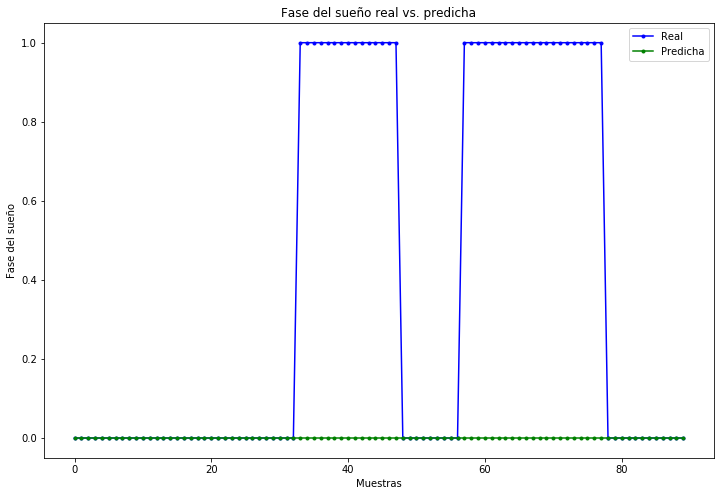

In [11]:
plt.figure(figsize=(12,8))
plt.plot(y_test_bin[0:90],color='blue', marker='.',label='Real')
plt.plot(predictions[0:90],color='green', marker='.',label='Predicha')

plt.title('Fase del sueño real vs. predicha')
plt.xlabel('Muestras')
plt.ylabel('Fase del sueño')
plt.legend()

**Residuos**

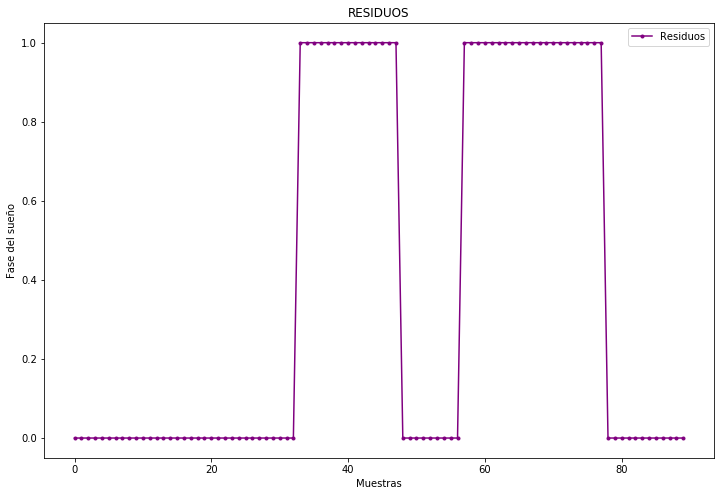

In [12]:
residuos= y_test_bin - predictions
plt.figure(figsize=(12,8))
plt.plot(residuos[0:90],color='purple', marker='.',label='Residuos')

plt.title('RESIDUOS')
plt.xlabel('Muestras')
plt.ylabel('Fase del sueño')
plt.legend()